## BUSINESS UNDERSTANDING

### 1.1 Overview
In the era of exponential data growth, the emergence of more sophisticated systems leveraging big data has become increasingly prevalent. Among these systems, recommendation systems have proven to be valuable information filtering tools, enhancing search results by providing users with more relevant items based on their search queries or browsing history. Major technology companies have embraced recommendation systems across various applications: YouTube utilizes them to determine the next autoplay video, while Spotify employs them to curate personalized "Made for You" daily mixes.

In line with this project's objectives, we aim to harness the power of data analysis to recommend the best books to users. By examining user behaviors, both individual and collective, we can derive insights that enable us to deliver tailored book recommendations that align with their interests and preferences.

The underlying principle of this project is to leverage data-driven techniques to understand user preferences and behaviors. By analyzing user interactions, historical data, and patterns, we can uncover valuable insights that inform our recommendation system. This allows us to present users with a curated list of book suggestions that are highly likely to resonate with their tastes.

### 1.2 Problem Statement
Book-Crossing is looking to optimize their recommendation system such that it will suggest different and new books with the emphasis on relevancy to the user tastes

We have therefore been appointed as Junior Data Scientists by Book-Crossing so as to optimize their book recommendation system. This will enhance customer engagement, and optimize relevant user recommendations.
The data set was obtained from here

### 1.3 The Data
The Book-Crossing dataset comprises 3 files:

`Users`: Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

`Books`: Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

`Ratings`: Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.


### 1.5 Project Goals
1. Develop a Personalized Book Recommendation Model
Build a robust recommendation engine using collaborative filtering (user-user or item-item) and/or matrix factorization techniques that predicts book preferences by analyzing the behavior of similar users. The model should rank books based on predicted ratings or affinity scores.

2. Address the Cold Start Problem
Design strategies to recommend books for new users with little to no interaction of data


3. Model Evaluation and Optimization
Continuously optimize the recommendation model using performance metrics such as Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and Precision@K/Recall@K. Apply techniques like cross-validation and hyperparameter tuning (e.g., for matrix factorization or neural collaborative filtering) to improve model accuracy and relevance.

4. Implement a Scalable Recommendation Function
Develop a reusable function (e.g., get_top_n_recommendations(user_id, n)) that returns the top N most relevant book recommendations for a given user, considering both model predictions and business logic (e.g., genre diversity, recency).


5. System Deployment and User Interface Integration
Deploy the recommendation engine using a backend framework (like Flask or FastAPI), connect it to a frontend or chatbot interface, and expose endpoints for fetching personalized book suggestions. Ensure API scalability, reliability, and response time optimizatio


## DATA UNDERSTANDING

### `Data Loading`

In [5]:
#Importing necessary libraries required to load and inspect the datasets.

import pandas as pd
import numpy as np


In [6]:
#importing the books data

books_df = pd.read_csv(
    r'C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\4. Library recomender system\books_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',
    on_bad_lines='skip',
    engine='python'  # Use python engine for more flexibility
)

books_df.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
#importing the rating dataset

rating_df = pd.read_csv(
    r'C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\4. Library recomender system\ratings_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',
    on_bad_lines='skip',
    engine='python'  
)

rating_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#importing the rating dataset

user_df = pd.read_csv(
    r'C:\Users\AHB\Desktop\my_quick_acess\3.Projects\projects pipeline\2025\4. Library recomender system\user_df.csv',
    sep=';',
    encoding='latin1',
    quotechar='"',
    on_bad_lines='skip',
    engine='python'  # Use python engine for more flexibility
)

user_df.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### `Data Inspection`

In [9]:
# Function to checking the shape, info and descriptive statistics of the dataset

def get_info_shape_stats(dataset, dataset_name):

    
    print('The Dataset:', dataset_name )

    print(f"has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

    print('-----------------------------------------------------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------------------------------------------------')

    print(dataset.info())
    print('-----------------------------------------------------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------------------------------------------------')
    print(dataset.dtypes)

In [10]:
#calling on the function get_info_shape_stats

get_info_shape_stats(rating_df, 'Ratings')

The Dataset: Ratings
has 1149766 rows and 3 columns
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149766 entries, 0 to 1149765
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149766 non-null  int64 
 1   ISBN         1149766 non-null  object
 2   Book-Rating  1149766 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
None
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
User-ID         int64
ISBN           object
Book-Rating     i

1. `Overview of the rating dataset`
    - The 'book_ratings' dataset contains a total of `1,149,780 rows` and `3 columns`. Here are some key observations about the dataset:

    - The dataset consists of the following columns:

        1. User-ID: An anonymized identifier for the users.
        2. ISBN: The unique identifier for the books.
        3. Book-Rating: The rating given by the users for the books. Ratings range from 0 to 10, with higher values indicating higher appreciation.

    - The dataset has no missing values as indicated by the 'Non-Null Count' column.

    - Data types:

        1. User-ID and Book-Rating columns are of integer type (int64).
        2. ISBN column is of object type (string).

In [11]:
get_info_shape_stats(user_df, 'users')

The Dataset: users
has 278177 rows and 3 columns
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278177 entries, 0 to 278176
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278177 non-null  int64  
 1   Location  278177 non-null  object 
 2   Age       167669 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
None
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
User-ID       int64
Location     object
Age         float64
dtype: obj

`Overview of the user dataset`

1. The 'users' dataset contains a total of `278,858 rows` and `3 columns`. Here are some key observations about the dataset:

2. The dataset consists of the following columns:

    - User-ID: An anonymized unique identifier for the users.
    - Location: The location of the users.
    - Age: The age of the users.

3. The dataset `has some missing values` in the 'Age' column, as indicated by the difference between the 'Non-Null Count' and the total number of rows.

4. Data types:

    - The 'User-ID' column is of integer type.
    - The 'Location' column is of object type (string).
    - The 'Age' column is of float type.

In [12]:
get_info_shape_stats(books_df, 'books')

The Dataset: books
has 270491 rows and 8 columns
-----------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270491 entries, 0 to 270490
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 270491 non-null  object
 1   Book-Title           270491 non-null  object
 2   Book-Author          270489 non-null  object
 3   Year-Of-Publication  270491 non-null  int64 
 4   Publisher            270489 non-null  object
 5   Image-URL-S          270491 non-null  object
 6   Image-URL-M          270491 non-null  object
 7   Image-URL-L          270491 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.5+ MB
None
---------------------------------

`Overview of the books dataset`

1. The 'books' dataset contains a total of 271,360 rows and 8 columns. Here are some key observations about the dataset:

2. The dataset consists of the following columns:

    - ISBN: The unique identifier for the books.
    - Book-Title: The title of the books.
    - Book-Author: The author of the books.
    - Year-Of-Publication: The year when the books were published.
    - Publisher: The publisher of the books.
    - Image-URL-S: The URL of the small-sized cover image of the books.
    - Image-URL-M: The URL of the medium-sized cover image of the books.
    - Image-URL-L: The URL of the large-sized cover image of the books.

3. The dataset has `some missing values` in the 'Book-Author', 'Publisher', and 'Image-URL-L' columns, as indicated by the 'Non-Null Count' column.

4. Data types:

    - All columns in the dataset are of object type (string).

### `Merging Files`

Step 1: Merging the **User dataset** and the **rating dataset** under the common ID `user_ID`

In [13]:
ratings_users = pd.merge(rating_df, user_df, on='User-ID')

rating_df.sample(n=5)

,User-ID,ISBN,Book-Rating
534003,128841,0345328205,0
62917,12736,190415123X,0
647161,156274,067972334X,8
134338,30735,0804111626,8
390936,94396,0425134350,10


In [14]:
rows, columns = rating_df.shape

print (f'The merged rating_user dataset has {rows} rows and {columns} columns')

The merged rating_user dataset has 1149766 rows and 3 columns


Step 2: Merging the **rating_user** dataset with the **books** datasets on the common feature `ISBN`

In [15]:
library_df = pd.merge(ratings_users, books_df, on='ISBN')

library_df.sample(n=5)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
623020,247664,0553268899,7,"london, ontario, canada",NaN,Beyond the Sea of Ice (First Americans Saga),William Sarabande,1987,Bantam,http://images.amazon.com/images/P/0553268899.0...,http://images.amazon.com/images/P/0553268899.0...,http://images.amazon.com/images/P/0553268899.0...
438804,221262,038531700X,0,"trumbull, ,",NaN,The Loop: A Novel,Nicholas Evans,1998,Delacorte Press,http://images.amazon.com/images/P/038531700X.0...,http://images.amazon.com/images/P/038531700X.0...,http://images.amazon.com/images/P/038531700X.0...
576363,105295,342333052X,9,"hamburg, hamburg, germany",NaN,Fermats letzter Satz.,Simon Singh,2000,Dtv,http://images.amazon.com/images/P/342333052X.0...,http://images.amazon.com/images/P/342333052X.0...,http://images.amazon.com/images/P/342333052X.0...
842829,188010,1850153086,9,"edmonton, alberta, canada",NaN,The Best of Women's Quotations (The Best of Qu...,Helen Exley,1993,Exley Giftbooks,http://images.amazon.com/images/P/1850153086.0...,http://images.amazon.com/images/P/1850153086.0...,http://images.amazon.com/images/P/1850153086.0...
80724,123261,0425142485,0,"south orange, new jersey, usa",41.0,The Funhouse,Dean R. Koontz,1994,Berkley Publishing Group,http://images.amazon.com/images/P/0425142485.0...,http://images.amazon.com/images/P/0425142485.0...,http://images.amazon.com/images/P/0425142485.0...


In [16]:
rows, columns = library_df.shape

print (f'The merged rating_user dataset has {rows} rows and {columns} columns')

The merged rating_user dataset has 1028626 rows and 12 columns


In [17]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028626 entries, 0 to 1028625
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1028626 non-null  int64  
 1   ISBN                 1028626 non-null  object 
 2   Book-Rating          1028626 non-null  int64  
 3   Location             1028626 non-null  object 
 4   Age                  751475 non-null   float64
 5   Book-Title           1028626 non-null  object 
 6   Book-Author          1028624 non-null  object 
 7   Year-Of-Publication  1028626 non-null  int64  
 8   Publisher            1028624 non-null  object 
 9   Image-URL-S          1028626 non-null  object 
 10  Image-URL-M          1028626 non-null  object 
 11  Image-URL-L          1028626 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 94.2+ MB


************************************************************************************************************************************************

## DATA CLEANING

### `Checking and handling duplicates columns`

In [18]:
#checking and handling duplicate columns

def find_duplicate_columns(df):
    # Create an empty list to store the names of duplicate columns
    duplicate_columns = []
    
    # Iterate over each column and compare it with the remaining columns
    for i in range(len(df.columns)):
        col1 = df.columns[i]
        for j in range(i + 1, len(df.columns)):
            col2 = df.columns[j]
            # Check if two columns are identical
            if df[col1].equals(df[col2]):
                duplicate_columns.append(col2)
    
    # Return the list of duplicate columns
    if len(duplicate_columns) > 0:
        print(f"Duplicate columns: {duplicate_columns}")
    else:
        print("No duplicate columns found")
    
    return duplicate_columns

find_duplicate_columns(library_df)

No duplicate columns found


[]

### `Removing unnecessary columns`

In [19]:
#column names
library_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [20]:
#Removing unnecessary colums for our model.
library_df.drop(['Image-URL-S','Image-URL-M', 'Image-URL-L'],axis=1, inplace=True)

#preview of the dataset after removing columns
library_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


## `Checking and handing missing values`

In [21]:
#checking for presense of missing values 

if library_df.isnull().values.any():
    print(True)
else:
    print(None)

True


In [22]:
#checking for missing values

missing_values = library_df.isnull().sum()

#printing missing values

print(missing_values[missing_values>0])

Age            277151
Book-Author         2
Publisher           2
dtype: int64


In [23]:
# Dropping  rows where Book-Author or Publisher is missing
library_df = library_df.dropna(subset=['Book-Author', 'Publisher'])

# Drop the Age column completely
library_df = library_df.drop(columns='Age')

# Optional: Check the result
print(library_df.isnull().sum())
print(library_df.shape)


User-ID                0
ISBN                   0
Book-Rating            0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64
(1028622, 8)


In [24]:
library_df.sample(n=5)

,User-ID,ISBN,Book-Rating,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
686163,57215,0553578170,7,"bellaire, texas, usa",Jane and the Wandering Eye: Being the Third Ja...,Stephanie Barron,1998,Bantam
714539,230458,0064470652,0,"chestertown, maryland, usa",Witch Baby (Weetzie Bat),Francesca Lia Block,1992,HarperTrophy
731702,204864,0142003808,0,"simi valley, california, usa",Drop City,T. Coraghessan Boyle,2004,Penguin USA (Paper)
59,274925,034545104X,7,"enfield, connecticut, usa",Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
311707,234683,0446364290,0,"lappvik, etelä-suomen lääni, finland",Prime Time,Sandra Brown,1995,Warner Books


## `Feature Engineering`

In [25]:
# Split location column, but allow flexible number of splits
location_split = library_df['Location'].str.split(',', expand=True)

# Assign new columns using only the first three columns (if they exist)
library_df['City'] = location_split[0].str.strip()
library_df['State'] = location_split[1].str.strip() if location_split.shape[1] > 1 else None
library_df['Country'] = location_split[2].str.strip() if location_split.shape[1] > 2 else None

# Optionally drop the original column
library_df.drop(columns='Location', inplace=True)

# Preview result
library_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,cincinnati,ohio,usa
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,strafford,missouri,usa
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,st. charles county,missouri,usa
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,beaverton,oregon,usa


********************************************************************************************************************************************

## EXPLANATORY DATA ANALYSIS

Using `domain knowledge` to visualize features that are likely to influence user preferences and recommendation outcomes.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


def visualize_feature(df, feature, top_n=10):
    """
    Visualize a feature from the dataframe with values on the x-axis.

    Parameters:
    df (DataFrame): Your DataFrame
    feature (str): Column name to visualize
    top_n (int): Show top N most frequent values (for categorical features)
    """
    plt.figure(figsize=(10, 6))

    # Check if it's categorical or low-cardinality
    if df[feature].dtype == 'object' or df[feature].nunique() < 30:
        top_values = df[feature].value_counts().nlargest(top_n)
        sns.barplot(x=top_values.index.astype(str), y=top_values.values, palette='viridis')
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(f"Top {top_n} Most Frequent Values in '{feature}'")
        plt.xticks(rotation=45, ha='right')

    else:
        # For numerical features
        sns.histplot(df[feature].dropna(), bins=20, kde=False, color='coral')
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of '{feature}'")

    plt.tight_layout()
    plt.show()


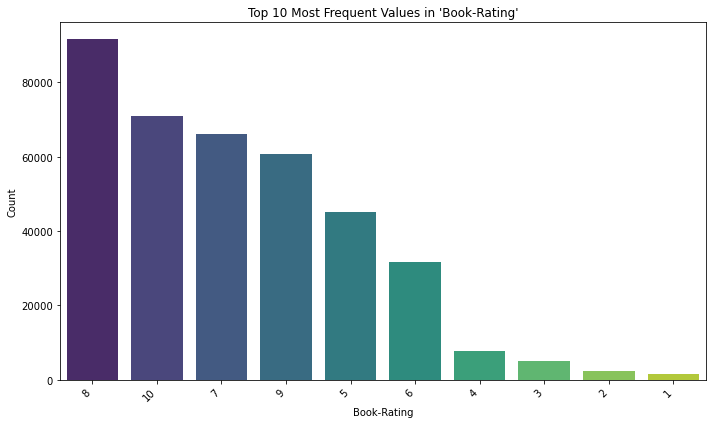

In [ ]:
visualize_feature(library_df[library_df['Book-Rating'] > 0], 'Book-Rating')


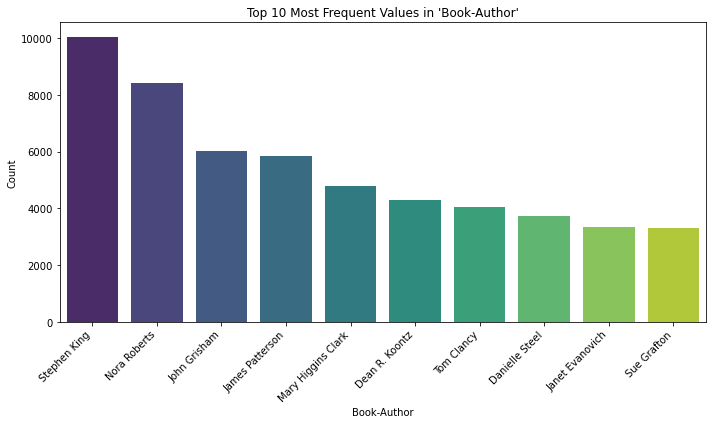

In [29]:
visualize_feature(library_df, 'Book-Author')

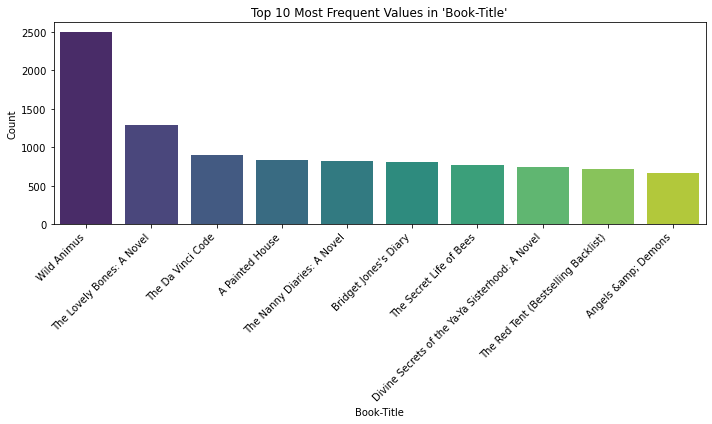

In [30]:
visualize_feature(library_df, 'Book-Title')

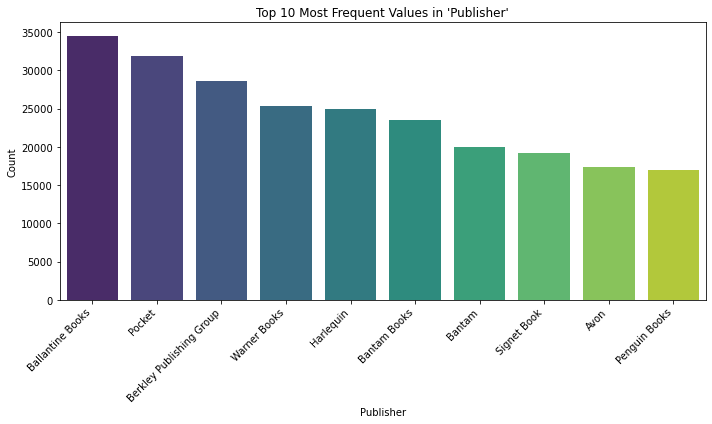

In [31]:
visualize_feature(library_df, 'Publisher')

In [40]:
import plotly.express as px

country_data = library_df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Count']

fig = px.choropleth(
    country_data,
    locations='Country',
    locationmode='country names',
    color='Count',
    color_continuous_scale='Viridis',  # Changed here
    range_color=(0, 900),
    title='User Distribution by Country'
)
fig.show()


### Findings




*********************************************************************************************************************************************

## FEATURE SELECTION